Este notebook se dedica a realizar um estudo do número ideal de indivíduos nos algoritmos genéticos

In [1]:
import sys
sys.path.append('../')
from optm_algorithms.pso import PSO
from optm_algorithms.differential_evolution import DifferentialEvolutionAlgorithm
from optm_algorithms.depso import DEPSO
from optm_algorithms.cma_es import CMA_ES

from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
from tqdm import tqdm
import json
import pandas as pd

rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(10,10)
fitness_func_class = rocket_fitness.calc_fitness


In [2]:
# Adiciona a seed ao numpy
np.random.seed(42)
rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(100,10)
fitness_func_class = rocket_fitness.calc_fitness

fitness_scores = fitness_func_class(random_values)
print(fitness_scores)

[0.5        0.         0.         0.5        0.5        0.
 0.5        0.5        0.5        0.         0.         0.5
 0.         0.5        0.         0.5        0.         0.
 0.5        0.5        0.         0.2879142  0.5        0.5
 0.5        0.         0.         0.29274715 0.41478951 0.
 0.5        0.         0.         0.         0.5        0.5
 0.         0.5        0.28222927 0.28916767 0.5        0.29633999
 0.         0.5        0.5        0.5        0.         0.5
 0.5        0.22860655 0.5        0.         0.         0.
 0.         0.5        0.5        0.5        0.         0.
 0.5        0.5        0.5        0.         0.5        0.
 0.         0.5        0.5        0.5        0.         0.
 0.5        0.         0.5        0.         0.5        0.5
 0.5        0.5        0.5        0.         0.         0.5
 0.         0.         0.25794767 0.5        0.         0.
 0.         0.         0.5        0.         0.         0.
 0.         0.34324438 0.         0.5     

In [3]:
import timeit
def calc_mean_time(fitness_func, n=10, start=100, end=5000, step=100):
    mean_times = []
    mean_n_occur = []
    mean_n_occur_perc = []
    pop_size = []
    for i in tqdm(range(start, end, step)):
        times = []
        for j in range(n):
            #np.random.seed(42)
            random_values = np.random.rand(i,10)
            start_time = timeit.default_timer()
            fitness = fitness_func(random_values)
            end_time = timeit.default_timer()
            elapsed_time = end_time - start_time
            times.append(elapsed_time)
            # Calcula o número de ocorrências de indivíduos com fitness maior que 0.5
            n_occur = fitness[fitness > 0.5].shape[0]
        mean_times.append(np.mean(times))
        # calcula a média e a média da porcentagem de ocorrências para retorná-las
        mean_n_occur.append( np.mean(n_occur))
        mean_n_occur_perc.append(np.mean(n_occur/i))
        pop_size.append(i)
        print(f"Population size: {i}")
        # converte em vetores 
    return mean_times, mean_n_occur, mean_n_occur_perc, pop_size

mean_times, mean_n_occur, mean_n_occur_perc,pop_size = calc_mean_time(fitness_func_class, n=10, start=100, end=3000, step=100)

  3%|▎         | 1/29 [00:02<00:57,  2.06s/it]

Population size: 100


  7%|▋         | 2/29 [00:05<01:12,  2.69s/it]

Population size: 200


 10%|█         | 3/29 [00:09<01:27,  3.36s/it]

Population size: 300


 14%|█▍        | 4/29 [00:14<01:42,  4.11s/it]

Population size: 400


 17%|█▋        | 5/29 [00:20<01:57,  4.88s/it]

Population size: 500


 21%|██        | 6/29 [00:28<02:12,  5.74s/it]

Population size: 600


 24%|██▍       | 7/29 [00:36<02:25,  6.60s/it]

Population size: 700


 28%|██▊       | 8/29 [00:46<02:38,  7.54s/it]

Population size: 800


 31%|███       | 9/29 [00:56<02:49,  8.45s/it]

Population size: 900


 34%|███▍      | 10/29 [01:08<02:58,  9.42s/it]

Population size: 1000


 38%|███▊      | 11/29 [01:20<03:07, 10.43s/it]

Population size: 1100


 41%|████▏     | 12/29 [01:34<03:14, 11.43s/it]

Population size: 1200


 45%|████▍     | 13/29 [01:49<03:18, 12.42s/it]

Population size: 1300


 48%|████▊     | 14/29 [02:05<03:22, 13.47s/it]

Population size: 1400


 52%|█████▏    | 15/29 [02:22<03:23, 14.51s/it]

Population size: 1500


 55%|█████▌    | 16/29 [02:40<03:22, 15.55s/it]

Population size: 1600


 59%|█████▊    | 17/29 [02:59<03:19, 16.60s/it]

Population size: 1700


 62%|██████▏   | 18/29 [03:19<03:13, 17.62s/it]

Population size: 1800


 66%|██████▌   | 19/29 [03:40<03:06, 18.63s/it]

Population size: 1900


 69%|██████▉   | 20/29 [04:02<02:57, 19.71s/it]

Population size: 2000


 72%|███████▏  | 21/29 [04:25<02:46, 20.78s/it]

Population size: 2100


 76%|███████▌  | 22/29 [04:50<02:33, 21.87s/it]

Population size: 2200


 79%|███████▉  | 23/29 [05:15<02:17, 22.91s/it]

Population size: 2300


 83%|████████▎ | 24/29 [05:42<02:00, 24.02s/it]

Population size: 2400


 86%|████████▌ | 25/29 [06:11<01:43, 25.78s/it]

Population size: 2500


In [ ]:
# Salva os valores mean_times, mean_n_occur, mean_n_occur_perc em um mesmo csv (com pandas) para não precisar rodar novamente
import pandas as pd
df = pd.DataFrame({'mean_times': mean_times, 'mean_n_occur': mean_n_occur, 'mean_n_occur_perc': mean_n_occur_perc, 'pop_size': pop_size})
df.to_csv('mean_times.csv', index=False)

In [ ]:
# Carrega os valores mean_times, mean_time, mean_n_occur
import pandas as pd
df = pd.read_csv('mean_times.csv')
mean_times = df['mean_times'].values
mean_time = df['mean_time'].values
mean_n_occur = df['mean_n_occur'].values


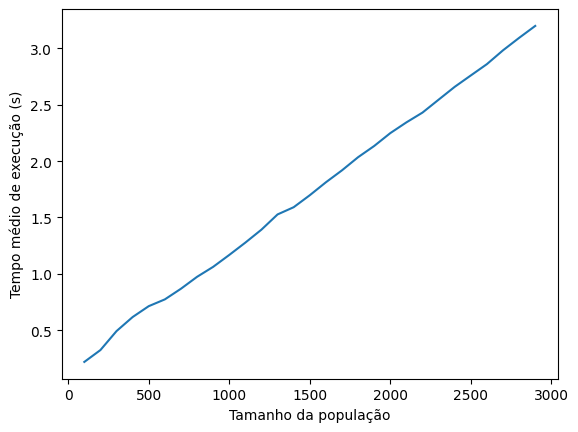

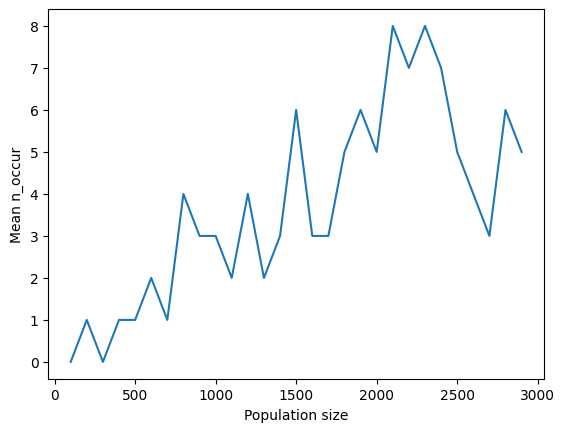

In [ ]:
# Plota um gráfico de tempo de execução em função do tamanho da população
import matplotlib.pyplot as plt
plt.plot(pop_size, mean_times)
plt.xlabel("Tamanho da população", fontsize=14)
plt.ylabel("Tempo médio de execução (s)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14) # Ajusta o tamanho da fonte dos números nos eixos

plt.show()

# Plota um gráfico de número de ocorrências em função do tamanho da população
import matplotlib.pyplot as plt
plt.plot(pop_size, mean_n_occur)
plt.xlabel("Population size")
plt.ylabel("Mean n_occur")
plt.show()
